# 1、数据预处理

In [1]:
import h5py
import numpy as np
import tensorflow as tf 
import keras
from keras.layers import Input, Dense, Dropout, Activation, BatchNormalization,concatenate, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from keras.models import Model
import matplotlib.pyplot as plt
%matplotlib inline

def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

file = h5py.File('DB3//DB3_S1_image.h5','r')
imageData   = file['imageData'][:]
imageData   = imageData*2000
imageLabel  = file['imageLabel'][:]  
file.close()

# 随机打乱数据和标签
N = imageData.shape[0]
index = np.random.permutation(N)
data  = imageData[index,:,:]
label = imageLabel[index]

# 对数据升维,标签one-hot
data  = np.expand_dims(data, axis=3)
label = convert_to_one_hot(label,16).T

# 划分数据集
N = data.shape[0]
num_train = round(N*0.8)
X_train = data[0:num_train,:,:,:]
Y_train = label[0:num_train,:]
X_test  = data[num_train:N,:,:,:]
Y_test  = label[num_train:N,:]

print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

D:\Anaconda\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


X_train shape: (3827, 200, 6, 1)
Y_train shape: (3827, 16)
X_test shape: (957, 200, 6, 1)
Y_test shape: (957, 16)


# 2、建立模型

In [2]:
def CNN(input_shape=(200,6,1), classes=16): 
    X_input = Input(input_shape)
    
    f1 = [20, 16, 12, 8]
    f2 = [3, 4, 5, 6]
    convs = []
    
    for i in range(4):
        x = Conv2D(filters=32, kernel_size=(f1[i],3), strides=(1,1), activation='relu',padding='valid')(X_input)
        x = MaxPooling2D((20,1))(x)
        
        x = Conv2D(filters=64, kernel_size=(f2[i],1), strides=(1,1), activation='relu', padding='valid')(x)
        x = MaxPooling2D((9-2-i,1))(x)
        
        x = Flatten()(x)
        convs.append(x)
        
    merge = concatenate(convs,axis=1)
    X = merge
    X = Dropout(0.5)(X)
    X = Dense(128,activation='relu')(X)
    X = Dropout(0.5)(X)
    X = Dense(classes, activation='softmax')(X)
    model = Model(inputs=X_input, outputs=X)
    return model
    
model = CNN()
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 200, 6, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 181, 4, 32)   1952        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 185, 4, 32)   1568        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 189, 4, 32)   1184        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_7 (

# 3、load 参数

In [3]:
model.load_weights('model_weights.h5')

In [4]:
for i in range(len(model.weights)):
    print(model.weights[i])

<tf.Variable 'conv2d_1/kernel:0' shape=(20, 3, 1, 32) dtype=float32_ref>
<tf.Variable 'conv2d_1/bias:0' shape=(32,) dtype=float32_ref>
<tf.Variable 'conv2d_3/kernel:0' shape=(16, 3, 1, 32) dtype=float32_ref>
<tf.Variable 'conv2d_3/bias:0' shape=(32,) dtype=float32_ref>
<tf.Variable 'conv2d_5/kernel:0' shape=(12, 3, 1, 32) dtype=float32_ref>
<tf.Variable 'conv2d_5/bias:0' shape=(32,) dtype=float32_ref>
<tf.Variable 'conv2d_7/kernel:0' shape=(8, 3, 1, 32) dtype=float32_ref>
<tf.Variable 'conv2d_7/bias:0' shape=(32,) dtype=float32_ref>
<tf.Variable 'conv2d_2/kernel:0' shape=(3, 1, 32, 64) dtype=float32_ref>
<tf.Variable 'conv2d_2/bias:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'conv2d_4/kernel:0' shape=(4, 1, 32, 64) dtype=float32_ref>
<tf.Variable 'conv2d_4/bias:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'conv2d_6/kernel:0' shape=(5, 1, 32, 64) dtype=float32_ref>
<tf.Variable 'conv2d_6/bias:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'conv2d_8/kernel:0' shape=(6, 1, 32, 64) dt

In [5]:
for i in range(len(model.get_weights())):
        print(model.get_weights()[i].shape)

c1w1 = model.get_weights()[0]
c1w2 = model.get_weights()[2]
c1w3 = model.get_weights()[4]
c1w4 = model.get_weights()[6]

c1b1 = model.get_weights()[1]
c1b2 = model.get_weights()[3]
c1b3 = model.get_weights()[5]
c1b4 = model.get_weights()[7]

c2w1 = model.get_weights()[8]
c2w2 = model.get_weights()[10]
c2w3 = model.get_weights()[12]
c2w4 = model.get_weights()[14]

c2b1 = model.get_weights()[9]
c2b2 = model.get_weights()[11]
c2b3 = model.get_weights()[13]
c2b4 = model.get_weights()[15]

(20, 3, 1, 32)
(32,)
(16, 3, 1, 32)
(32,)
(12, 3, 1, 32)
(32,)
(8, 3, 1, 32)
(32,)
(3, 1, 32, 64)
(64,)
(4, 1, 32, 64)
(64,)
(5, 1, 32, 64)
(64,)
(6, 1, 32, 64)
(64,)
(1024, 128)
(128,)
(128, 16)
(16,)


In [6]:
print(c1b1.shape,c1b2.shape,c1b3.shape,c1b4.shape,c2b1.shape,c2b2.shape,c2b3.shape,c2b4.shape)
c1b1 = c1b1.reshape(1,1,1,c1b1.shape[0])
c1b2 = c1b2.reshape(1,1,1,c1b2.shape[0])
c1b3 = c1b3.reshape(1,1,1,c1b3.shape[0])
c1b4 = c1b4.reshape(1,1,1,c1b4.shape[0])
c2b1 = c2b1.reshape(1,1,1,c2b1.shape[0])
c2b2 = c2b2.reshape(1,1,1,c2b2.shape[0])
c2b3 = c2b3.reshape(1,1,1,c2b3.shape[0])
c2b4 = c2b4.reshape(1,1,1,c2b4.shape[0])
print(c1b1.shape,c1b2.shape,c1b3.shape,c1b4.shape,c2b1.shape,c2b2.shape,c2b3.shape,c2b4.shape)

(32,) (32,) (32,) (32,) (64,) (64,) (64,) (64,)
(1, 1, 1, 32) (1, 1, 1, 32) (1, 1, 1, 32) (1, 1, 1, 32) (1, 1, 1, 64) (1, 1, 1, 64) (1, 1, 1, 64) (1, 1, 1, 64)


# 4、前向计算函数（吴恩达 深度学习课程 编程练习）

x.shape = (4, 3, 3, 2)
x_pad.shape = (4, 7, 7, 2)


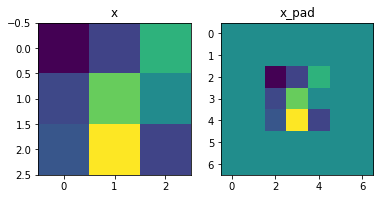

In [7]:
def zero_pad(X, pad):
    X_pad = np.pad(X, ((0,0), (pad,pad), (pad,pad), (0,0)), 'constant')
    return X_pad
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =", x.shape)
print ("x_pad.shape =", x_pad.shape)

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

In [8]:
def conv_single_step(a_slice_prev, W, b):
    s = a_slice_prev * W  # element_wise product between a_slice and W
    Z = np.sum(s)         # sum over all entries of the volume s
    Z = Z + b             # add bias b to Z to a float()，therefore Z in a scalar value
    return Z 

np.random.seed(2)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)
Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z = [[[-6.1034344]]]


In [9]:
def conv_forward(A_prev, W, b, hparameters):
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    (f1, f2, n_C_prev, n_C) = W.shape

    stride = hparameters["stride"]
    pad    = hparameters["pad"]

    # 计算conv 输出维度
    n_H = int((n_H_prev - f1 + 2*pad)/stride + 1)
    n_W = int((n_W_prev - f2 + 2*pad)/stride + 1)

    # 用0初始化输出Z
    Z = np.zeros((m, n_H, n_W, n_C)) 
    # padding A_prev
    A_prev_pad = zero_pad(A_prev, pad)

    for i in range(m):                   # 循环所有的训练样本
        a_prev_pad = A_prev_pad[i,:,:,:]
        for h in range(n_H):             # 循环输出的所有垂直轴 
            for w in range(n_W):         # 循环输出的所有水平轴
                for c in range(n_C):     # 循环输出的所有通道数（=滤波器数）
                    # 寻找当前 “slice” 的 corners
                    vert_start  = stride * h 
                    vert_end    = vert_start + f1 
                    horiz_start = stride * w 
                    horiz_end   = horiz_start + f2 

                    # 使用 corners 定义3D slice 在当前的 prev_pad 
                    a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
                    # convolve 3D slice 
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, W[:,:,:,c], b[:,:,:,c])
    # 确保输出的形状是正确的 
    assert(Z.shape == (m, n_H, n_W, n_C))
    cache = (A_prev, W, b, hparameters)
    return Z, cache

np.random.seed(1)
A_prev = np.random.randn(2,200,6,1)
W = np.random.randn(20,3,1,32)
b = np.random.randn(1,1,1,32)
hparameters = {"pad" : 0, "stride": 1}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("input shape=",A_prev.shape)
print("output shape=",Z.shape)

input shape= (2, 200, 6, 1)
output shape= (2, 181, 4, 32)


In [10]:
def pool_forward(A_prev, hparameters, mode="max"):
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

    [f1,f2] = hparameters["f"]
    [stride1,stride2] = hparameters["stride"]

    # 定义输出维度
    n_H = int(1 + (n_H_prev - f1)/stride1)
    n_W = int(1 + (n_W_prev - f2)/stride2)
    n_C = n_C_prev

    # 0初始化输出
    A = np.zeros((m, n_H, n_W, n_C))

    for i in range(m):
        for h in range(n_H):
            for w in range(n_W):
                for c in range(n_C):

                    # 寻找当前 “slice” 的角
                    vert_start  = h * stride1
                    vert_end    = vert_start + f1 
                    horiz_start = w * stride2
                    horiz_end   = horiz_start + f2 

                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]

                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)
    cache = (A_prev, hparameters)
    assert(A.shape == (m, n_H, n_W, n_C))
    return A, cache

np.random.seed(1)
A_prev = np.random.randn(2, 181, 4, 32)
hparameters = {"stride" : [20,1], "f": [20,1]}
A, cache = pool_forward(A_prev, hparameters)

print("input shape=",A_prev.shape)
print("output shape=",A.shape)

input shape= (2, 181, 4, 32)
output shape= (2, 9, 4, 32)


# 5、肌电信号 卷积网络 前向计算

In [11]:
x = X_train[0:20,:,:,:]
print(x.shape)

(20, 200, 6, 1)


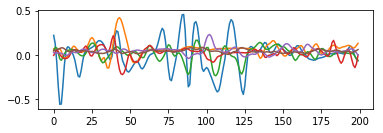

In [12]:
plt.subplot(2,1,1)
plt.plot(x[0,:,:,0])
# plt.subplot(2,1,2)
# plt.plot(x[1,:,:,0])

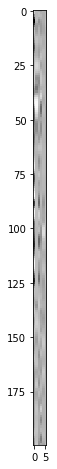

In [13]:
plt.figure(figsize=(16,8))
plt.imshow(x[0,:,:,0], cmap='Greys_r')

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    return np.exp(x)/np.sum(np.exp(x),axis=0)



### 5-1 conv1

In [15]:
hparameters = {"pad" : 0, "stride": 1}
c1x1,_ = conv_forward(x, c1w1, c1b1, hparameters)
c1x2,_ = conv_forward(x, c1w2, c1b2, hparameters)
c1x3,_ = conv_forward(x, c1w3, c1b3, hparameters)
c1x4,_ = conv_forward(x, c1w4, c1b4, hparameters)

c1x1 = relu(c1x1)
c1x2 = relu(c1x2)
c1x3 = relu(c1x3)
c1x4 = relu(c1x4)

print("input shape=",x.shape)
print("output1 shape=",c1x1.shape)
print("output2 shape=",c1x2.shape)
print("output3 shape=",c1x3.shape)
print("output4 shape=",c1x4.shape)

input shape= (20, 200, 6, 1)
output1 shape= (20, 181, 4, 32)
output2 shape= (20, 185, 4, 32)
output3 shape= (20, 189, 4, 32)
output4 shape= (20, 193, 4, 32)


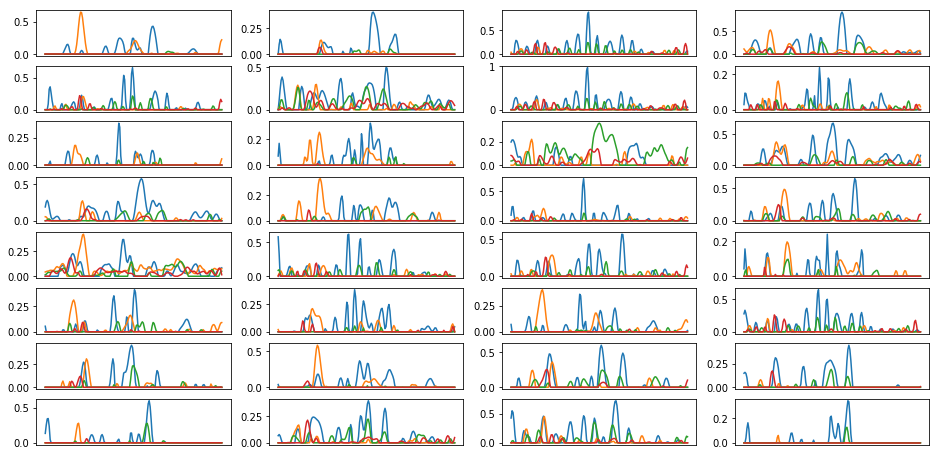

In [16]:
plt.figure(figsize=(16,8))
for i in range(c1x1.shape[3]):
    plt.subplot(8,4,i+1)
    plt.plot(c1x1[0,:,:,i])
#     plt.yticks([])
    plt.xticks([])

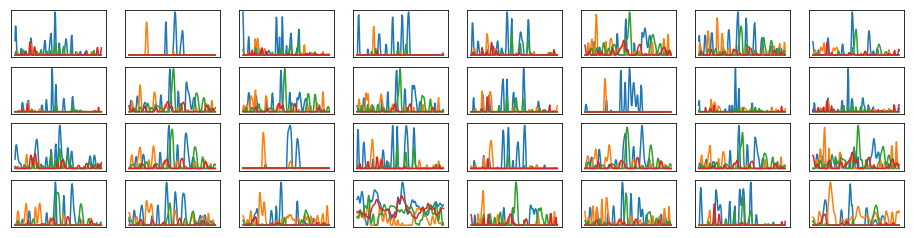

In [17]:
plt.figure(figsize=(16,4))
for i in range(c1x2.shape[3]):
    plt.subplot(4,8,i+1)
    plt.plot(c1x2[0,:,:,i])
    plt.yticks([])
    plt.xticks([])

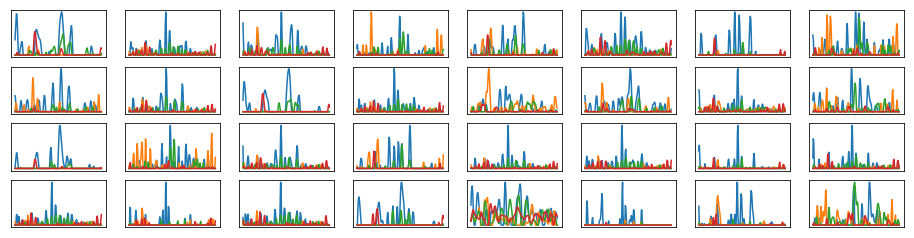

In [18]:
plt.figure(figsize=(16,4))
for i in range(c1x3.shape[3]):
    plt.subplot(4,8,i+1)
    plt.plot(c1x3[0,:,:,i])
    plt.yticks([])
    plt.xticks([])

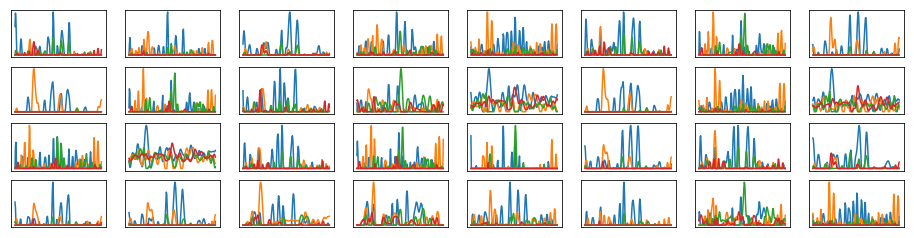

In [19]:
plt.figure(figsize=(16,4))
for i in range(c1x4.shape[3]):
    plt.subplot(4,8,i+1)
    plt.plot(c1x4[0,:,:,i])
    plt.yticks([])
    plt.xticks([])

### 5-2 pool1

In [20]:
hparameters = {"stride" : [20,1], "f": [20,1]}

p1x1,_ = pool_forward(c1x1, hparameters, mode="max")
p1x2,_ = pool_forward(c1x2, hparameters, mode="max")
p1x3,_ = pool_forward(c1x3, hparameters, mode="max")
p1x4,_ = pool_forward(c1x4, hparameters, mode="max")

print("output1 shape=",p1x1.shape)
print("output2 shape=",p1x2.shape)
print("output3 shape=",p1x3.shape)
print("output4 shape=",p1x4.shape)

output1 shape= (20, 9, 4, 32)
output2 shape= (20, 9, 4, 32)
output3 shape= (20, 9, 4, 32)
output4 shape= (20, 9, 4, 32)


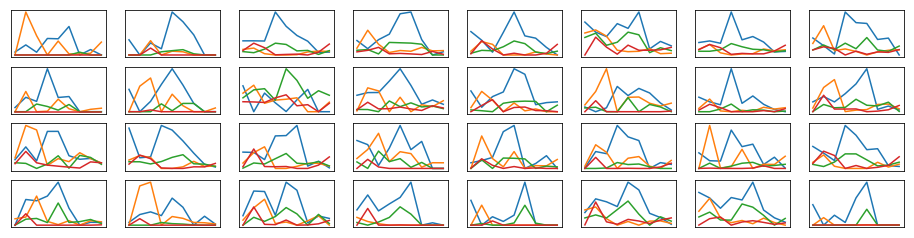

In [21]:
plt.figure(figsize=(16,4))
for i in range(p1x1.shape[3]):
    plt.subplot(4,8,i+1)
    plt.plot(p1x1[0,:,:,i])
    plt.yticks([])
    plt.xticks([])

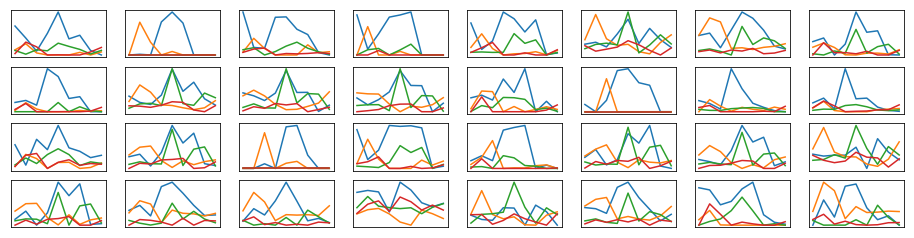

In [22]:
plt.figure(figsize=(16,4))
for i in range(p1x2.shape[3]):
    plt.subplot(4,8,i+1)
    plt.plot(p1x2[0,:,:,i])
    plt.yticks([])
    plt.xticks([])

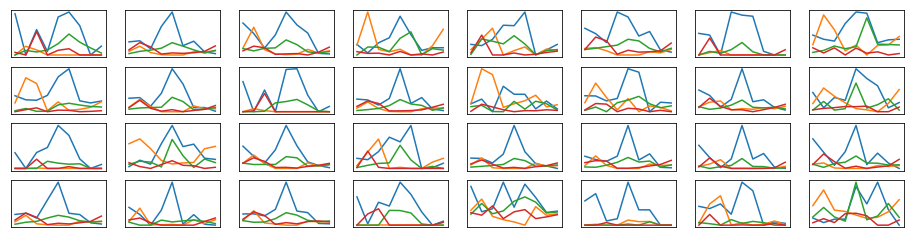

In [23]:
plt.figure(figsize=(16,4))
for i in range(p1x3.shape[3]):
    plt.subplot(4,8,i+1)
    plt.plot(p1x3[0,:,:,i])
    plt.yticks([])
    plt.xticks([])

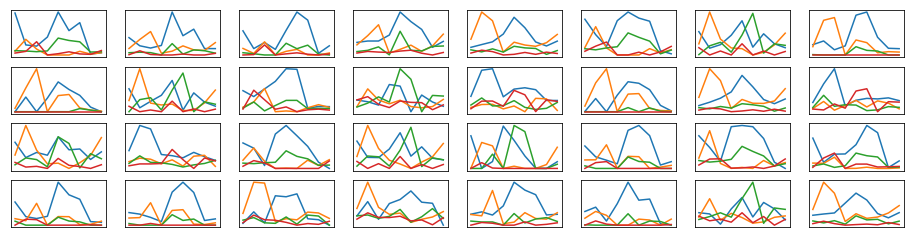

In [24]:
plt.figure(figsize=(16,4))
for i in range(p1x4.shape[3]):
    plt.subplot(4,8,i+1)
    plt.plot(p1x4[0,:,:,i])
    plt.yticks([])
    plt.xticks([])

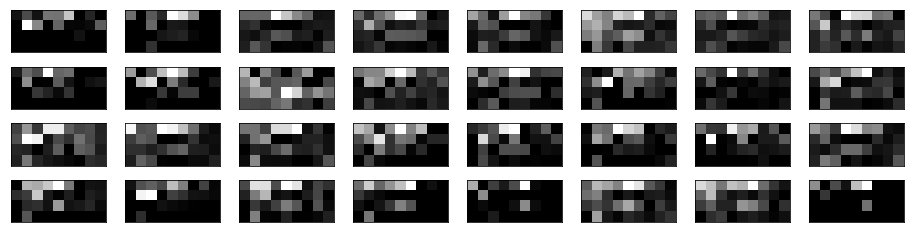

In [25]:
plt.figure(figsize=(16,4))
for i in range(p1x1.shape[3]):
    plt.subplot(4,8,i+1)
    plt.yticks([])
    plt.xticks([])
    plt.imshow(p1x1[0,:,:,i].T, cmap='Greys_r')

### 5-3 conv2

In [26]:
hparameters = {"pad" : 0, "stride": 1}
c2x1,_ = conv_forward(p1x1, c2w1, c2b1, hparameters)
c2x2,_ = conv_forward(p1x2, c2w2, c2b2, hparameters)
c2x3,_ = conv_forward(p1x3, c2w3, c2b3, hparameters)
c2x4,_ = conv_forward(p1x4, c2w4, c2b4, hparameters)

c2x1 = relu(c2x1)
c2x2 = relu(c2x2)
c2x3 = relu(c2x3)
c2x4 = relu(c2x4)

print("output1 shape=",c2x1.shape)
print("output2 shape=",c2x2.shape)
print("output3 shape=",c2x3.shape)
print("output4 shape=",c2x4.shape)

output1 shape= (20, 7, 4, 64)
output2 shape= (20, 6, 4, 64)
output3 shape= (20, 5, 4, 64)
output4 shape= (20, 4, 4, 64)


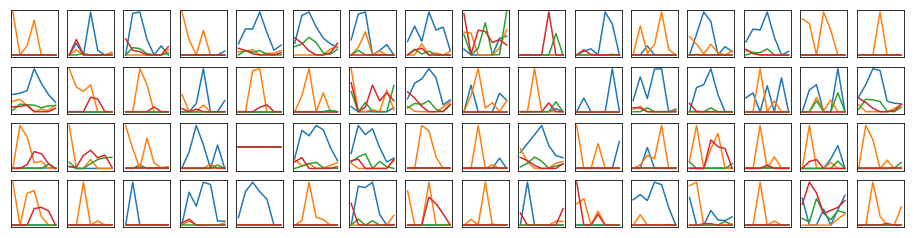

In [27]:
plt.figure(figsize=(16,4))
for i in range(c2x1.shape[3]):
    plt.subplot(4,16,i+1)
    plt.plot(c2x1[0,:,:,i])
    plt.yticks([])
    plt.xticks([])

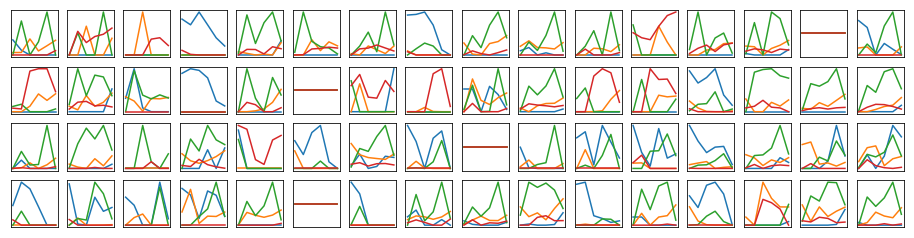

In [28]:
plt.figure(figsize=(16,4))
for i in range(c2x2.shape[3]):
    plt.subplot(4,16,i+1)
    plt.plot(c2x2[0,:,:,i])
    plt.yticks([])
    plt.xticks([])

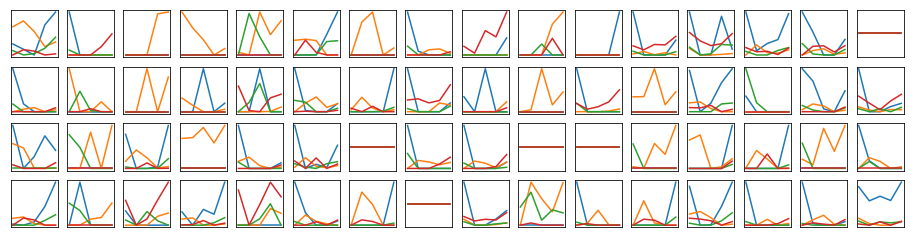

In [29]:
plt.figure(figsize=(16,4))
for i in range(c2x3.shape[3]):
    plt.subplot(4,16,i+1)
    plt.plot(c2x3[0,:,:,i])
    plt.yticks([])
    plt.xticks([])

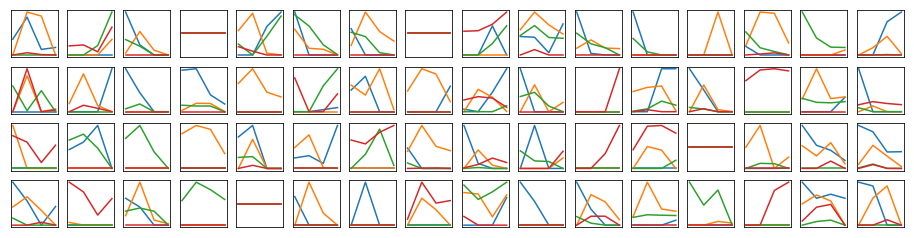

In [30]:
plt.figure(figsize=(16,4))
for i in range(c2x4.shape[3]):
    plt.subplot(4,16,i+1)
    plt.plot(c2x4[0,:,:,i])
    plt.yticks([])
    plt.xticks([])

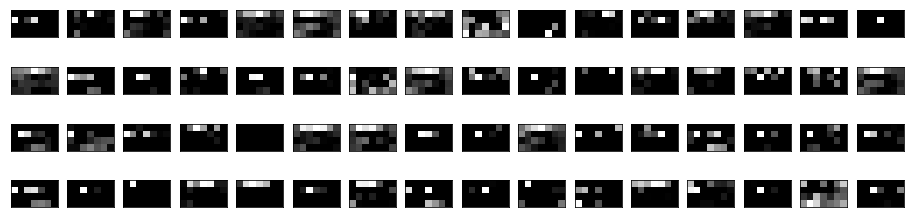

In [31]:
plt.figure(figsize=(16,4))
for i in range(c2x1.shape[3]):
    plt.subplot(4,16,i+1)
    plt.yticks([])
    plt.xticks([])
    plt.imshow(c2x1[0,:,:,i].T, cmap='Greys_r')

### 5-4 pool2

In [32]:
p1 = {"stride" : [c2x1.shape[1],1], "f": [c2x1.shape[1],1]}
p2 = {"stride" : [c2x2.shape[1],1], "f": [c2x2.shape[1],1]}
p3 = {"stride" : [c2x3.shape[1],1], "f": [c2x3.shape[1],1]}
p4 = {"stride" : [c2x4.shape[1],1], "f": [c2x4.shape[1],1]}

p2x1,_ = pool_forward(c2x1, p1, mode="max")
p2x2,_ = pool_forward(c2x2, p2, mode="max")
p2x3,_ = pool_forward(c2x3, p3, mode="max")
p2x4,_ = pool_forward(c2x4, p4, mode="max")

print("output1 shape=",p2x1.shape)
print("output2 shape=",p2x2.shape)
print("output3 shape=",p2x3.shape)
print("output4 shape=",p2x4.shape)

output1 shape= (20, 1, 4, 64)
output2 shape= (20, 1, 4, 64)
output3 shape= (20, 1, 4, 64)
output4 shape= (20, 1, 4, 64)


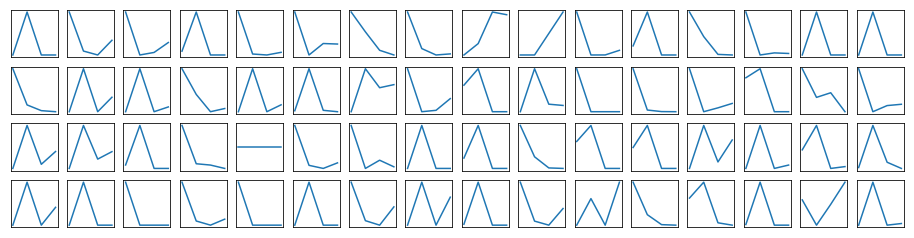

In [33]:
plt.figure(figsize=(16,4))
for i in range(p2x1.shape[3]):
    plt.subplot(4,16,i+1)
    plt.plot(p2x1[0,:,:,i].T)
    plt.yticks([])
    plt.xticks([])

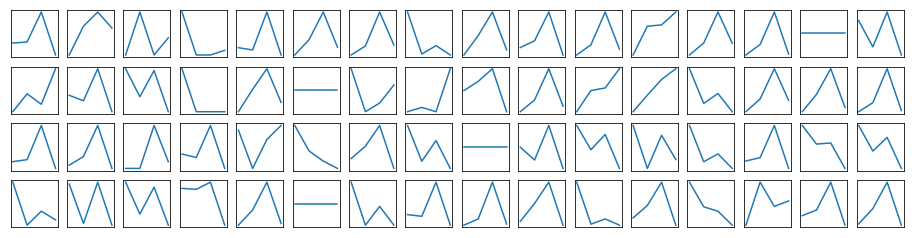

In [34]:
plt.figure(figsize=(16,4))
for i in range(p2x2.shape[3]):
    plt.subplot(4,16,i+1)
    plt.plot(p2x2[0,:,:,i].T)
    plt.yticks([])
    plt.xticks([])

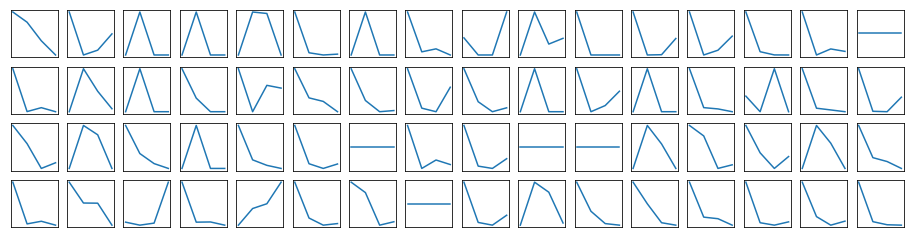

In [35]:
plt.figure(figsize=(16,4))
for i in range(p2x3.shape[3]):
    plt.subplot(4,16,i+1)
    plt.plot(p2x3[0,:,:,i].T)
    plt.yticks([])
    plt.xticks([])

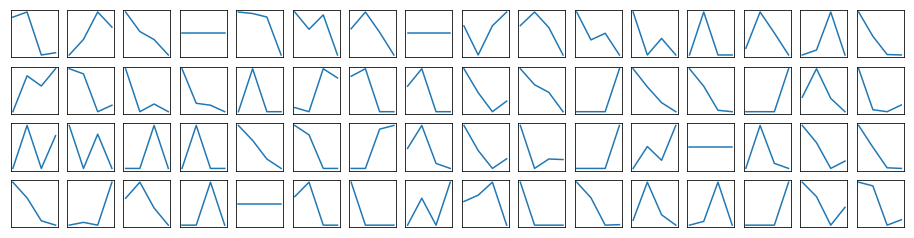

In [36]:
plt.figure(figsize=(16,4))
for i in range(p2x4.shape[3]):
    plt.subplot(4,16,i+1)
    plt.plot(p2x4[0,:,:,i].T)
    plt.yticks([])
    plt.xticks([])

### 5-5 flatten

In [37]:
f1=p2x1.reshape((p2x1.shape[0],-1))
f2=p2x2.reshape((p2x2.shape[0],-1))
f3=p2x3.reshape((p2x3.shape[0],-1))
f4=p2x4.reshape((p2x4.shape[0],-1))

print(f1.shape)
print(f2.shape)
print(f3.shape)
print(f4.shape)

fx = np.hstack((f1,f2,f3,f4))
print(fx.shape)

(20, 256)
(20, 256)
(20, 256)
(20, 256)
(20, 1024)


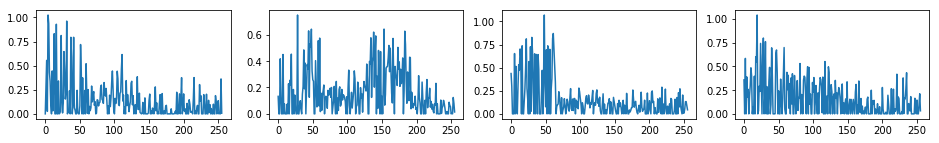

In [38]:
plt.figure(figsize=(16,2))
plt.subplot(1,4,1)
plt.plot(f1[0,:])
plt.subplot(1,4,2)
plt.plot(f2[0,:])
plt.subplot(1,4,3)
plt.plot(f3[0,:])
plt.subplot(1,4,4)
plt.plot(f4[0,:])

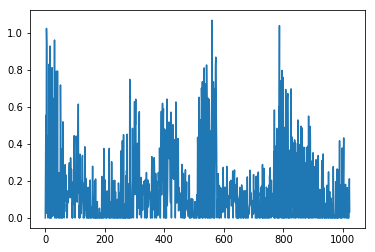

In [39]:
plt.plot(fx[0,:])

### 5-6 fc

In [40]:
# 权重、偏置参数
w1 = model.get_weights()[-4]
b1 = model.get_weights()[-3]

w2 = model.get_weights()[-2]
b2 = model.get_weights()[-1]

print(w1.shape,w2.shape)
print(b1.shape,b2.shape)

(1024, 128) (128, 16)
(128,) (16,)


In [41]:
fc1 = np.dot(fx,w1)+b1
fc1 = relu(fc1)
print(fc1.shape)

fc2 = np.dot(fc1,w2)+b2
fc2 = softmax(fc2)
print(fc2.shape)

(20, 128)
(20, 16)


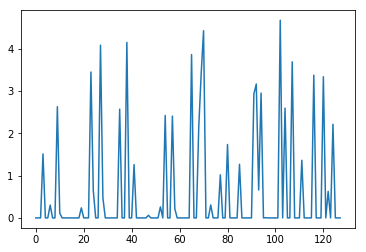

In [42]:
plt.plot(fc1[0,:])

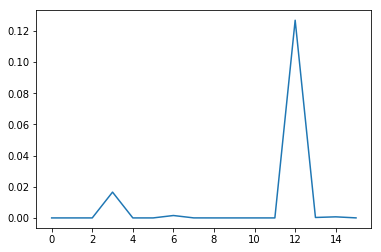

In [43]:
plt.plot(fc2[0,:])

In [44]:
y = np.argmax(fc2,axis=1)
print(y)

[12 15 12  2  9  4 10  8 10  0 11 13  4  3 12  5  5  9  9  3]


In [45]:
y_true = np.argmax(Y_train[0:20],axis=1)
print(y_true)

[12 11  8  1  9  4 10  8 10  0 11  1  4  8 12  4 11  9  9  8]


In [46]:
print(fc2)

[[2.87624589e-08 7.98720719e-12 2.17876537e-08 1.65480482e-02
  3.14863454e-10 2.41449099e-08 1.54180138e-03 1.70401287e-05
  1.62111276e-07 4.75424970e-08 4.60901767e-09 2.11456728e-13
  1.26800487e-01 2.80107876e-04 6.93362897e-04 2.31928767e-05]
 [6.73895459e-11 1.00241929e-08 2.33635141e-08 1.07493654e-12
  1.07423432e-14 1.21717510e-07 8.60842251e-06 7.73825863e-04
  1.38241590e-16 1.24367638e-17 1.88513938e-15 8.96408739e-01
  8.26979064e-17 1.98266115e-04 1.18307372e-05 9.68786808e-01]
 [3.87740764e-09 9.24307140e-17 2.63985335e-15 4.10839742e-02
  2.86361670e-14 2.98442480e-11 1.66684796e-03 1.53771434e-05
  7.60301979e-03 1.06178681e-08 2.73394087e-11 5.46267034e-18
  4.26604678e-01 1.18467348e-06 2.34817598e-04 4.20010987e-07]
 [2.55114825e-13 6.59172122e-02 9.33764098e-01 3.79979542e-11
  7.59942600e-12 5.97631877e-10 4.31996535e-14 3.26268493e-12
  3.84604194e-18 1.55833296e-11 1.98583999e-07 3.60372440e-10
  1.16420386e-10 2.26125164e-03 2.70560675e-01 4.03424246e-06]
 [1.

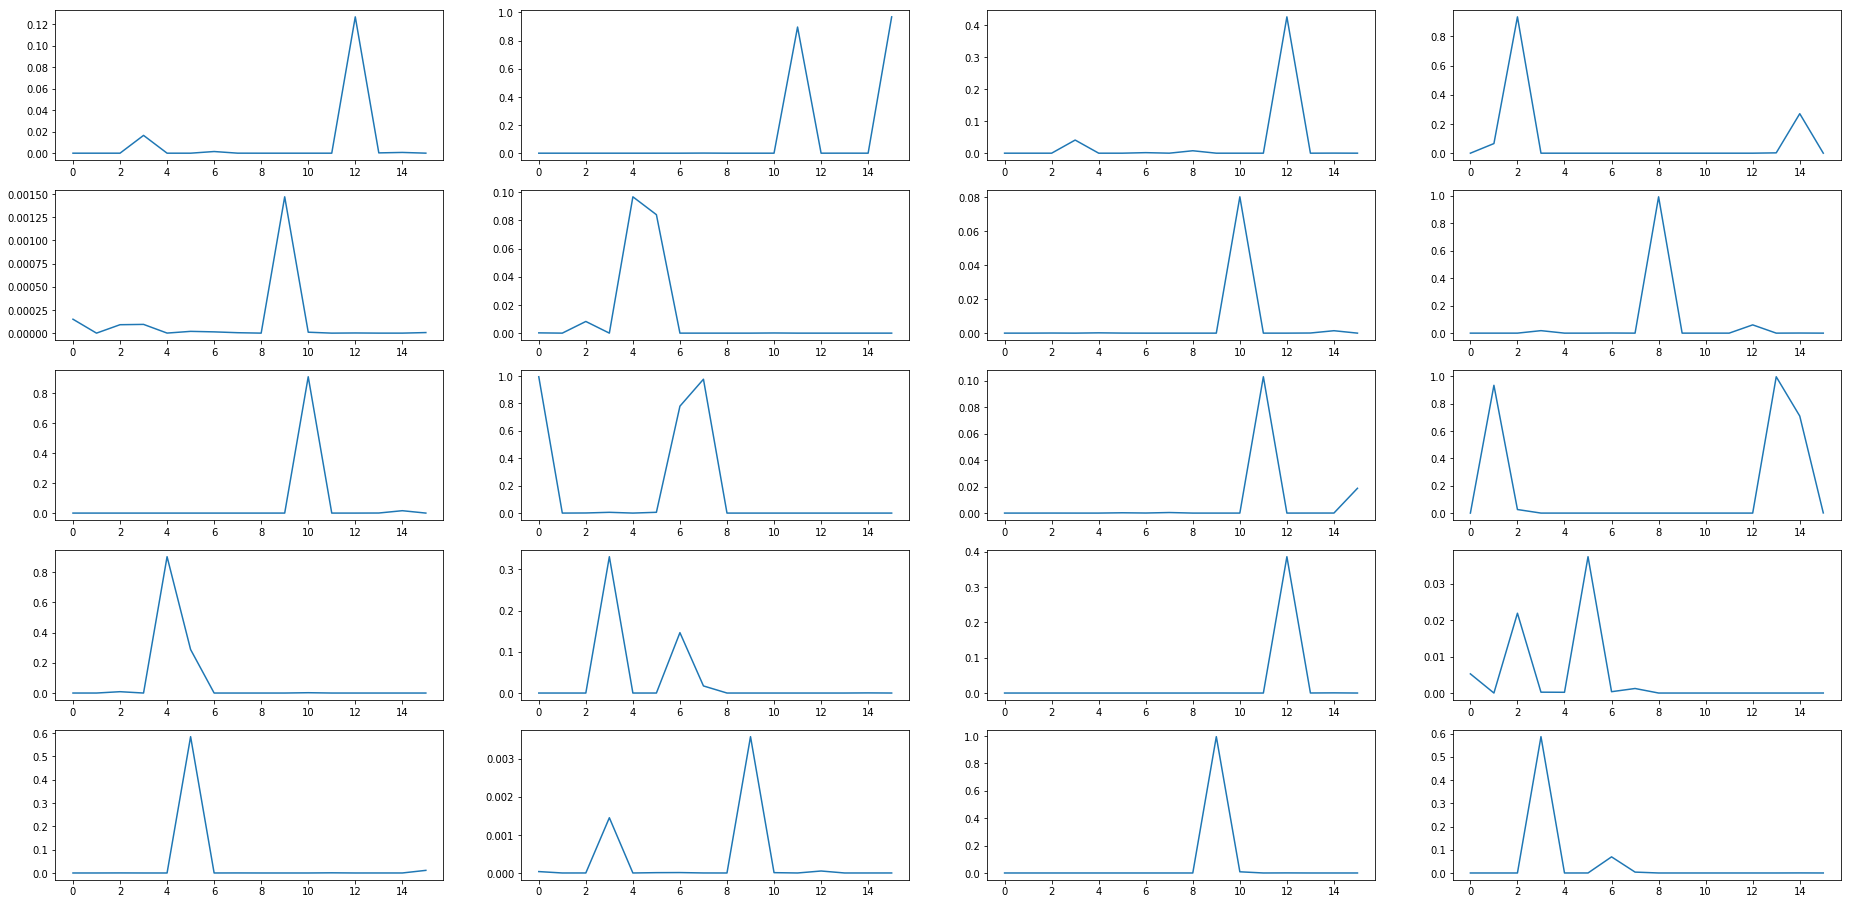

In [47]:
plt.figure(figsize=(32,16))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.plot(fc2[i,:])

### 5-7 不同类别下的 conv编码

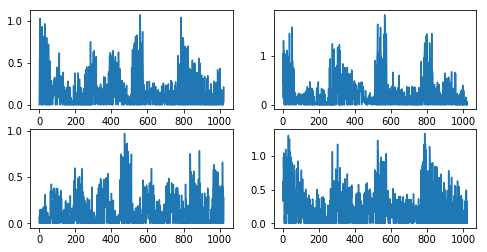

In [48]:
plt.figure(figsize=(8,4))
m = [0,2,3,4]
for i in range(len(m)):
    plt.subplot(2,2,i+1)
    plt.plot(fx[m[i],:].T)